In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

LabelEncoder = transforming Categorical data into numerical data
plot_tree = visualizes decision tree splits

In [9]:
df = pd.read_csv('loan_train.csv')

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Handling missing values

iloc[0] means “give me the first row,”
and in this context it helps us fill all missing values with the most common value for each column.

In [13]:
df.fillna(df.mode().iloc[0], inplace = True)

Encode categorical data: Beacause decision tree cannot handles categorical data so it must be convereted into numeric data

In [14]:
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])



In [15]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [18]:
x = DecisionTreeClassifier(max_depth = 4, random_state = 42)
x.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Making Predictions

In [19]:
y_pred = x.predict((x_test))

In [20]:
print("Accuracy:", accuracy_score(y_pred,y_test))
print("ClassificationReport:", classification_report(y_pred,y_test))

Accuracy: 0.7723577235772358
ClassificationReport:               precision    recall  f1-score   support

           0       0.42      0.86      0.56        21
           1       0.96      0.75      0.85       102

    accuracy                           0.77       123
   macro avg       0.69      0.81      0.70       123
weighted avg       0.87      0.77      0.80       123



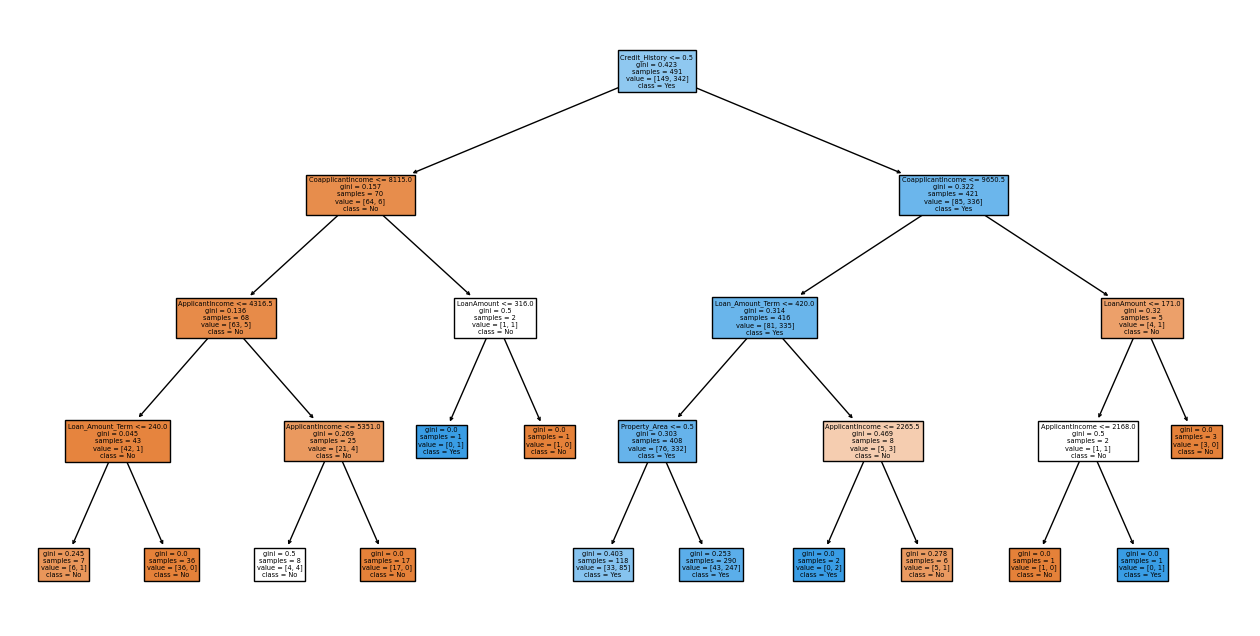

In [25]:
plt.figure(figsize=(16,8))
plot_tree(x, feature_names=x_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
